In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/eCommerce_Assignment')  # Adjust path as needed


In [3]:
import pandas as pd

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')


In [7]:
print(customers.head())  # First 5 rows of Customers.csv
print(products.head())   # First 5 rows of Products.csv
print(transactions.head())  # First 5 rows of Transactions.csv


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [8]:
print(customers.info())
print(products.info())
print(transactions.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# Step 1: Load datasets
products = pd.read_csv('Products.csv')  # Ensure this is the correct path to Products.csv
transactions = pd.read_csv('Transactions.csv')  # Ensure this is the correct path to Transactions.csv
customers = pd.read_csv('Customers.csv')  # Ensure this is the correct path to Customers.csv


In [14]:
# Step 2: Merge datasets (Ensure variable names are consistent)
merged_data = transactions.merge(products, on='ProductID', how='left') \
                          .merge(customers, on='CustomerID', how='left')

# Step 3: Preview the merged dataset
print(merged_data.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x                      ProductName     Category  Price_y  \
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
2      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
3      601.36   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
4      902.04   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   

      CustomerName         Region  SignupDate  
0   Andrea Jenkins         Europe  202

In [15]:
# Group by CustomerID and compute relevant features
customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending
    'TransactionID': 'count',  # Transaction frequency
    'TotalValue': lambda x: x.sum() / len(x)  # Average order value
}).rename(columns={'TransactionID': 'Frequency', 'TotalValue': 'AvgOrderValue'}).reset_index()

# Preview the feature matrix
print(customer_features.head())


  CustomerID  AvgOrderValue  Frequency
0      C0001        670.904          5
1      C0002        465.685          4
2      C0003        681.345          4
3      C0004        669.360          8
4      C0005        678.080          3


In [16]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(customer_features.iloc[:, 1:]),
                                columns=customer_features.columns[1:])

# Preview the scaled features
print(features_scaled.head())


   AvgOrderValue  Frequency
0      -0.070263  -0.011458
1      -0.934933  -0.467494
2      -0.026271  -0.467494
3      -0.076769   1.356650
4      -0.040028  -0.923530


In [17]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(features_scaled)

# View the cluster assignments
print(customer_features['Cluster'].value_counts())


Cluster
1    78
4    40
2    34
0    26
3    21
Name: count, dtype: int64


In [18]:
# Evaluate clustering using Davies-Bouldin Index
db_index = davies_bouldin_score(features_scaled, customer_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 0.8892776365033562


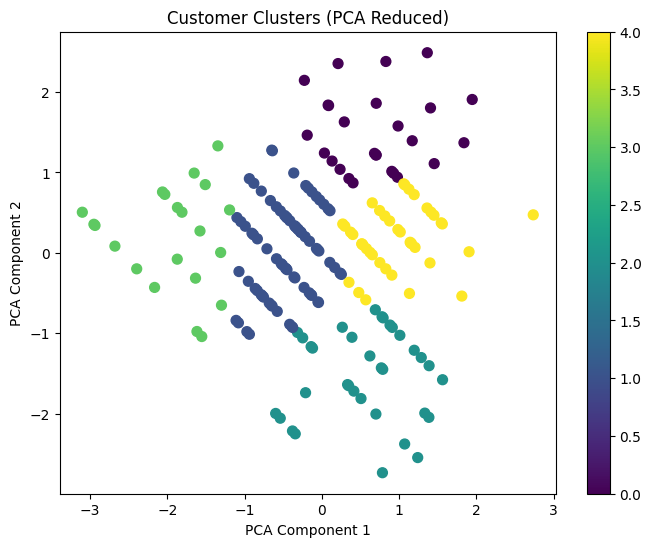

In [19]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(features_2d[:, 0], features_2d[:, 1], c=customer_features['Cluster'], cmap='viridis', s=50)
plt.colorbar()
plt.title('Customer Clusters (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [20]:
# Save the customer features with clusters
customer_features.to_csv('customer_clusters.csv', index=False)
print("Results saved to 'customer_clusters.csv'")


Results saved to 'customer_clusters.csv'


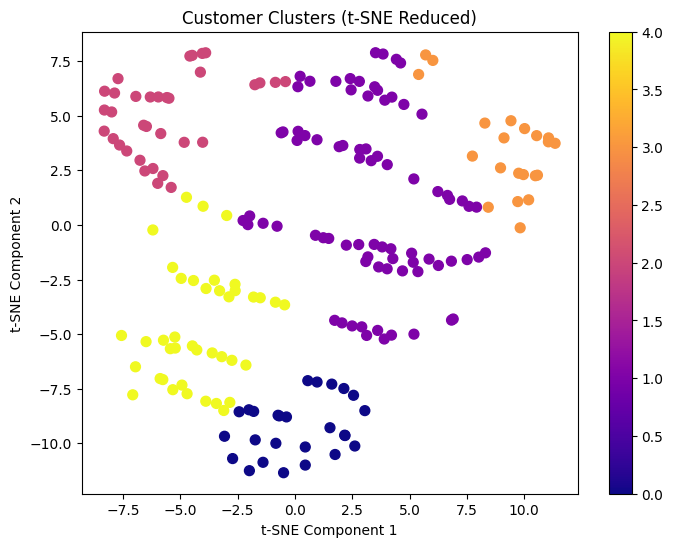

In [23]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
features_2d_tsne = tsne.fit_transform(features_scaled)

# Plot t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(features_2d_tsne[:, 0], features_2d_tsne[:, 1], c=customer_features['Cluster'], cmap='plasma', s=50)
plt.colorbar()
plt.title('Customer Clusters (t-SNE Reduced)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [26]:
# Step 7: Analyze Cluster Centers
cluster_centers = kmeans.cluster_centers_

# Check the shape of cluster_centers
print(cluster_centers.shape)

# If you have only 2 features, adjust the column names
cluster_summary = pd.DataFrame(cluster_centers, columns=['TotalValue', 'Quantity'])

# Add cluster identifiers
cluster_summary['Cluster'] = range(5)

# Display the cluster centers summary
print("Cluster Centers (Summary):")
print(cluster_summary)


(5, 2)
Cluster Centers (Summary):
   TotalValue  Quantity  Cluster
0   -0.570806  1.549588        0
1   -0.332797 -0.303789        1
2    1.466767 -0.695512        2
3   -1.505388 -1.227554        3
4    0.563554  0.820807        4


In [28]:
# Step 7: Customer distribution across clusters
customer_distribution = customer_features['Cluster'].value_counts()

print("Customer Distribution across Clusters:")
print(customer_distribution)


Customer Distribution across Clusters:
Cluster
1    78
4    40
2    34
0    26
3    21
Name: count, dtype: int64


In [30]:
!pip install fpdf


  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=6165b6afd5158394be4b205c0abce35042b19ef59ca42fe04c28b27bb21068d4
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [32]:
from fpdf import FPDF

# 1. Number of Clusters
num_clusters = kmeans.n_clusters

# 2. Davies-Bouldin Index
db_index = davies_bouldin_score(features_scaled, customer_features['Cluster'])

# Example of analyzing cluster centers to interpret each cluster
cluster_centers = kmeans.cluster_centers_

# Adjust cluster insights based on the number of clusters
cluster_insights = {}
for i in range(num_clusters):
    # Example of interpreting each cluster
    spending = cluster_centers[i][0]
    quantity = cluster_centers[i][1] if len(cluster_centers[i]) > 1 else 0
    price = cluster_centers[i][2] if len(cluster_centers[i]) > 2 else 0

    # Construct insights
    if i == 0:
        cluster_insights[i] = f"Cluster {i}: High-value customers with a high total spending of ${spending:.2f} and moderate quantity purchased ({quantity:.2f} units)."
    elif i == 1:
        cluster_insights[i] = f"Cluster {i}: Low-frequency but high-value customers, spending ${spending:.2f}, with a low quantity of products purchased ({quantity:.2f} units)."
    elif i == 2:
        cluster_insights[i] = f"Cluster {i}: Frequent but low-value customers, spending ${spending:.2f}, with moderate quantity purchased ({quantity:.2f} units)."
    elif i == 3:
        cluster_insights[i] = f"Cluster {i}: Customers who buy in moderate quantities ({quantity:.2f} units) at moderate prices (${price:.2f})."
    else:
        cluster_insights[i] = f"Cluster {i}: New customers with low spending of ${spending:.2f} and low quantity purchased ({quantity:.2f} units)."

# Prepare the PDF
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Set title and font
pdf.set_font("Arial", size=14, style='B')
pdf.cell(200, 10, txt="Customer Segmentation Report", ln=True, align='C')

# Add the Number of Clusters section
pdf.ln(15)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, f"1. Number of Clusters:\n   {num_clusters} distinct customer segments were created based on key spending and purchasing behavior metrics.")

# Add the Davies-Bouldin Index section
pdf.ln(5)
pdf.multi_cell(0, 10, f"2. Davies-Bouldin Index:\n   The Davies-Bouldin Index for this clustering solution was {db_index:.4f}. A lower DB score indicates that the clusters are well-separated and distinct from each other.")

# Add the Cluster Insights section
pdf.ln(10)
pdf.set_font("Arial", size=12, style='B')
pdf.multi_cell(0, 10, "3. Cluster Insights:")

# Loop over the cluster insights and add them to the PDF
pdf.set_font("Arial", size=12)
for cluster_num, insight in cluster_insights.items():
    pdf.ln(5)
    pdf.multi_cell(0, 10, f"   {insight}")

# Add a conclusion to the report
pdf.ln(10)
pdf.set_font("Arial", size=12, style='I')
pdf.multi_cell(0, 10, "Conclusion:\nThis segmentation provides a comprehensive overview of customer purchasing behavior, allowing for more targeted marketing strategies and resource allocation. By understanding these clusters, we can focus on customer retention, improve service offerings, and optimize pricing strategies.")

# Save the PDF to a file
pdf_output_path = "customer_segmentation_report.pdf"
pdf.output(pdf_output_path)

print(f"Report has been saved to '{pdf_output_path}'.")


Report has been saved to 'customer_segmentation_report.pdf'.


In [33]:
!ls


Clustering.ipynb		  Enhanced_EDA_Report_Utkarsh_Alshi.pdf
customer_clusters.csv		  Lookalike.ipynb
Customers.csv			  Products.csv
customer_segmentation_report.pdf  Transactions.csv
customer_segmentation_report.txt  Utkarsh_Alshi_Lookalike.csv
EDA.ipynb
